<a href="https://colab.research.google.com/github/bernardowenzel/MVP_SPRINT_1/blob/main/MVP_Bernardo_Wenzel_Sprint_2_Engenharia_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Projeto de Engenharia de Dados**

Ferramenta de Nuvem utilizada: Microsoft Fabric

Motivo: Apesar de apenas mencionada durante a Sprint, a ferramenta Microsoft Fabric ainda está em versão de testes e será brevemente lançada.

Atualmente, trabalho como Analista de Dados na área de BI de uma empresa farmacêutica e estamos iniciando o projeto de migração do ambiente produtivo on-premises para ambiente em cloud.

Dentre nossas pesquisas e análises sobre as ferramentas disponíveis no mercado, o Microsoft Fabric foi a que mais nos encantou, principalmente por englobar todas as esferas e ferramentas relacionadas a dados de ponta a ponta em uma única plataforma.

Além disso, já conseguimos criar a cultura de dashboards em Power BI por toda empresa, inclusive com acesso disponibilizado para todas as 114 lojas espalhadas pelo estado do Rio de Janeiro.

**Case Projeto MVP**

Sou analista de Business Intelligence numa empresa nacional de grande porte com muitas franquias de revenda de carros seminovos.

O diretor comercial me solicitou uma análise das vendas dos carros de nosso portfólio para avaliar qual estratégia traçar para o segundo trimestre de 2023. A diretoria e presidência temem por uma recessão e querem saber se já é possível identificar um reflexo disso nas vendas da empresa.

# 1 - Armazenamento dos Dados em Nuvem - Criação Data Lake

Criação de Data Lake no Microsoft Fabric com dois arquivos csv, sendo um com as vendas dos carros e outro o calendário.

Como boas práticas e aproveitando os recursos da ferramenta, foi adicionada uma descrição do Data Lake como forma de catalogação da estrutura, vide imagem abaixo.

A ferramente Lake House do Microsoft Fabric possui duas nativamente duas subdivisões: uma para armazenamento de todos os arquivos em seus formatos originais e brutos (que funcionará como storage em nuvem), e outro para disponibilização dos dados levemente tratados para visualização em formato tabular.

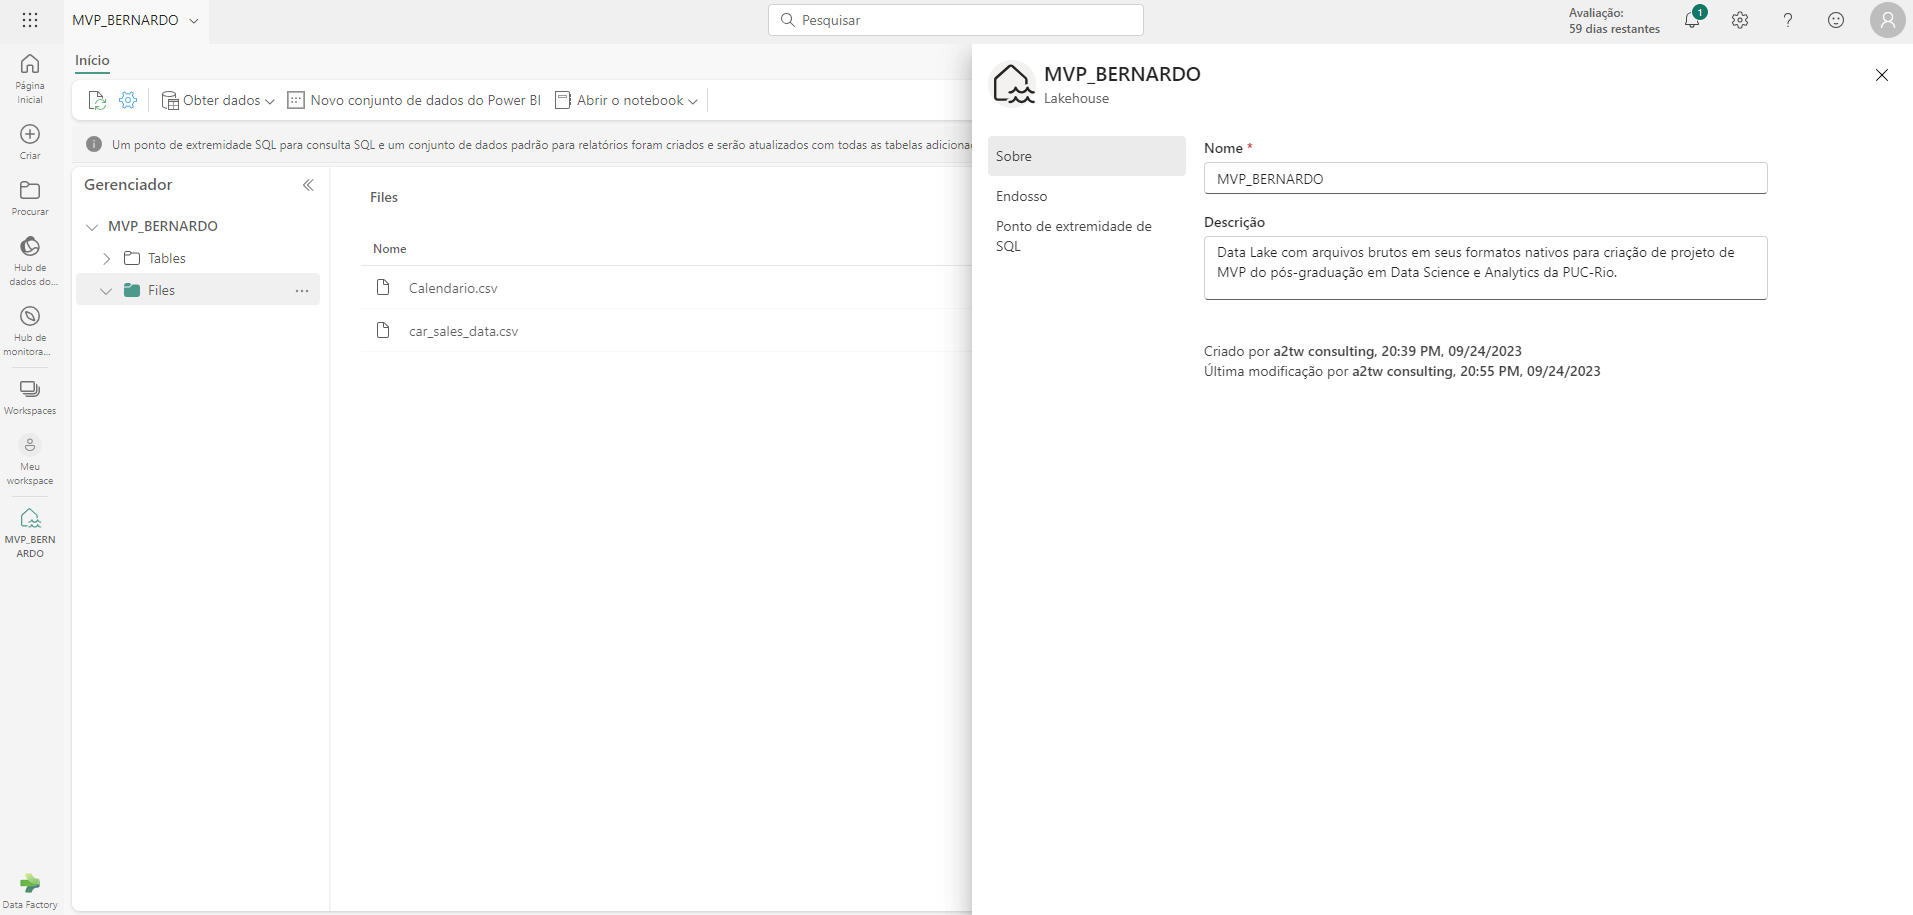

## 1.1 - Criação de Pipeline - Data Lake

Pipeline para transformar o arquivo bruto csv Calendario em formato tabular dentro do Data Lake, configurando os campos nos formatos adequados.

- Conexão ao Data Lake para puxar arquivos

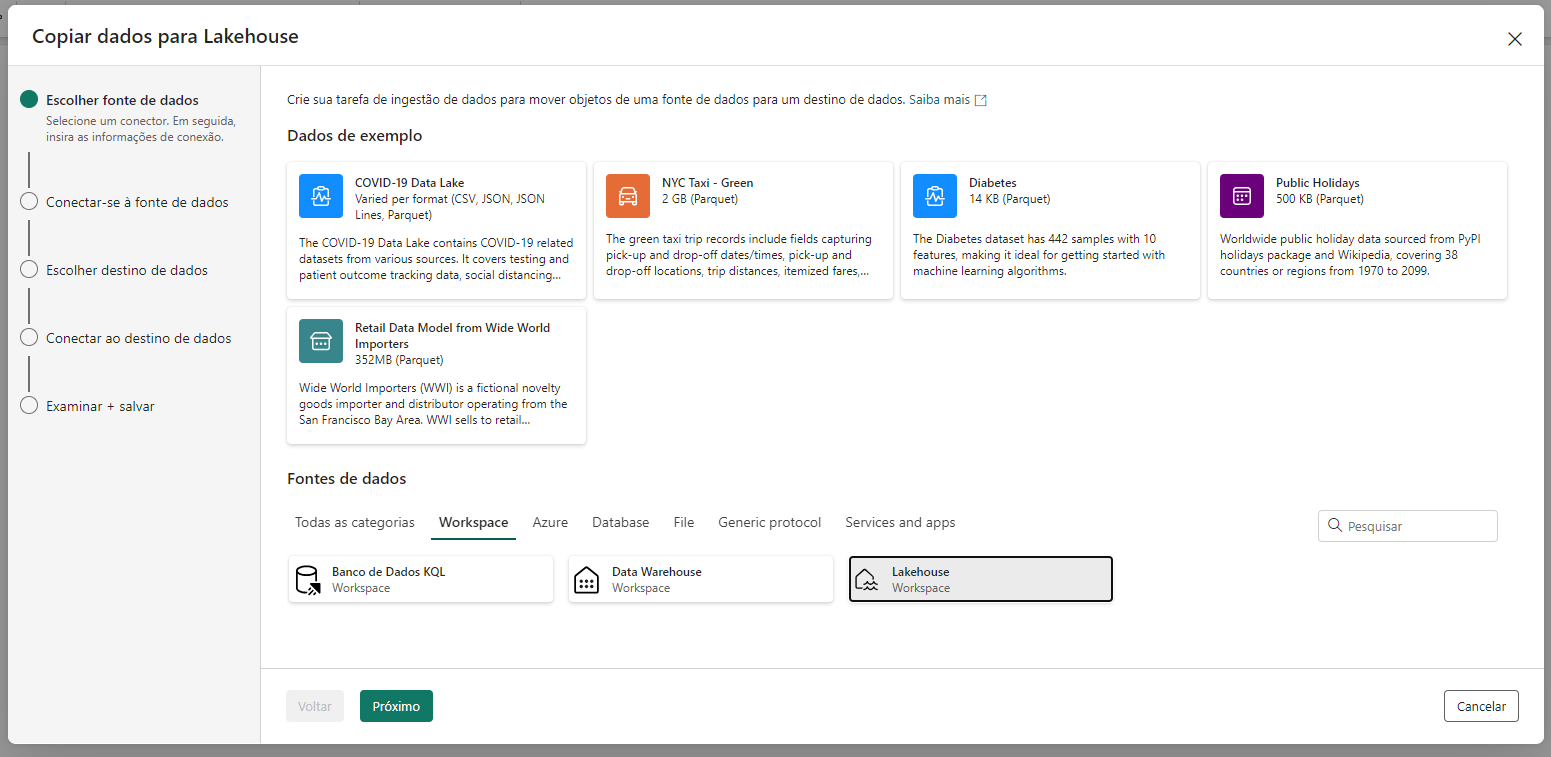

- Escolha do arquivo de Calendario para criação da tabela Calendário

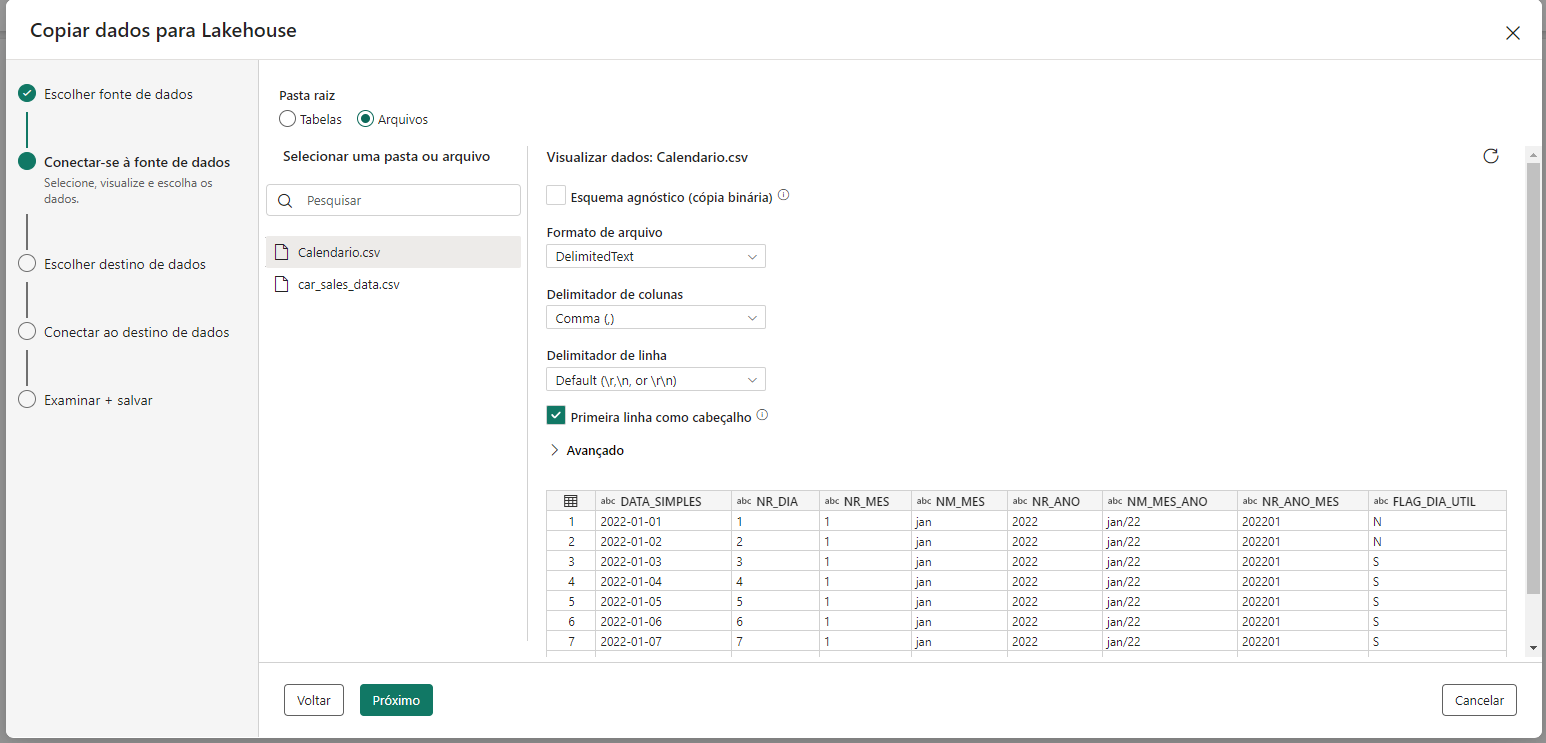

- Mapeamento das colunas e definição dos formatos

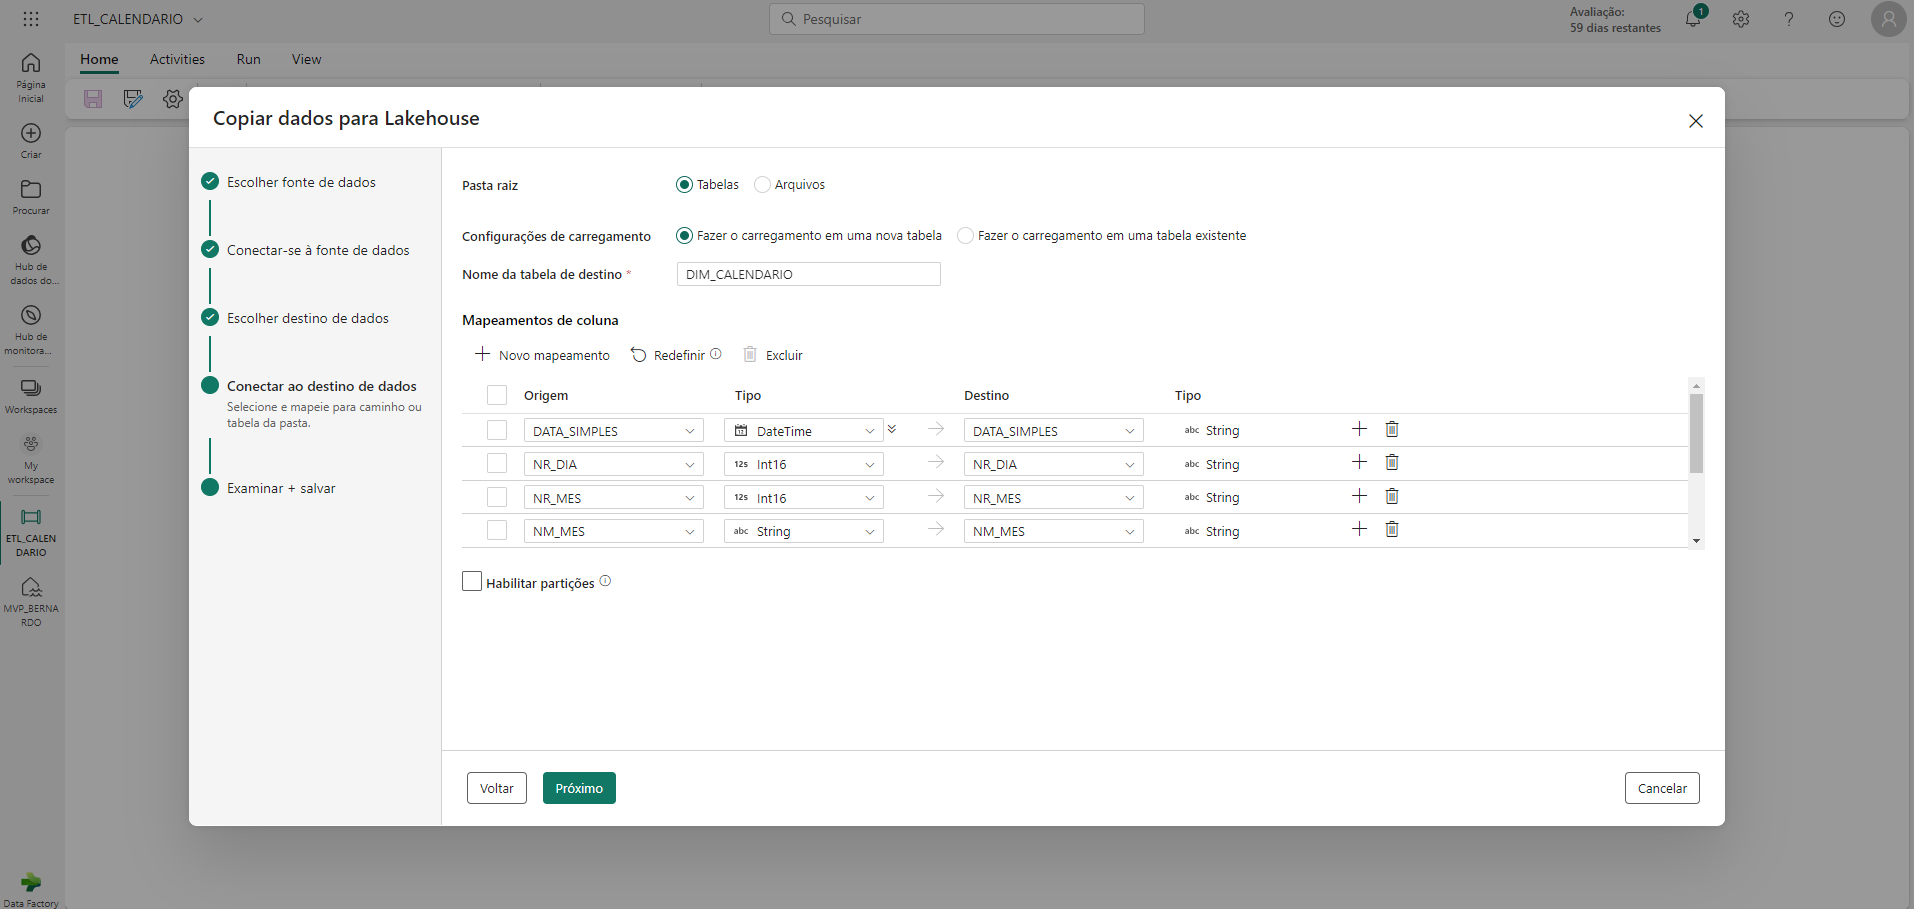

- Execução do Pipeline criado para criação da tabela DIM_CALENDARIO dentro do Data Lake a partir do arquivo csv Calendario.
Conforme imagem abaixo, execução foi bem sucedida.

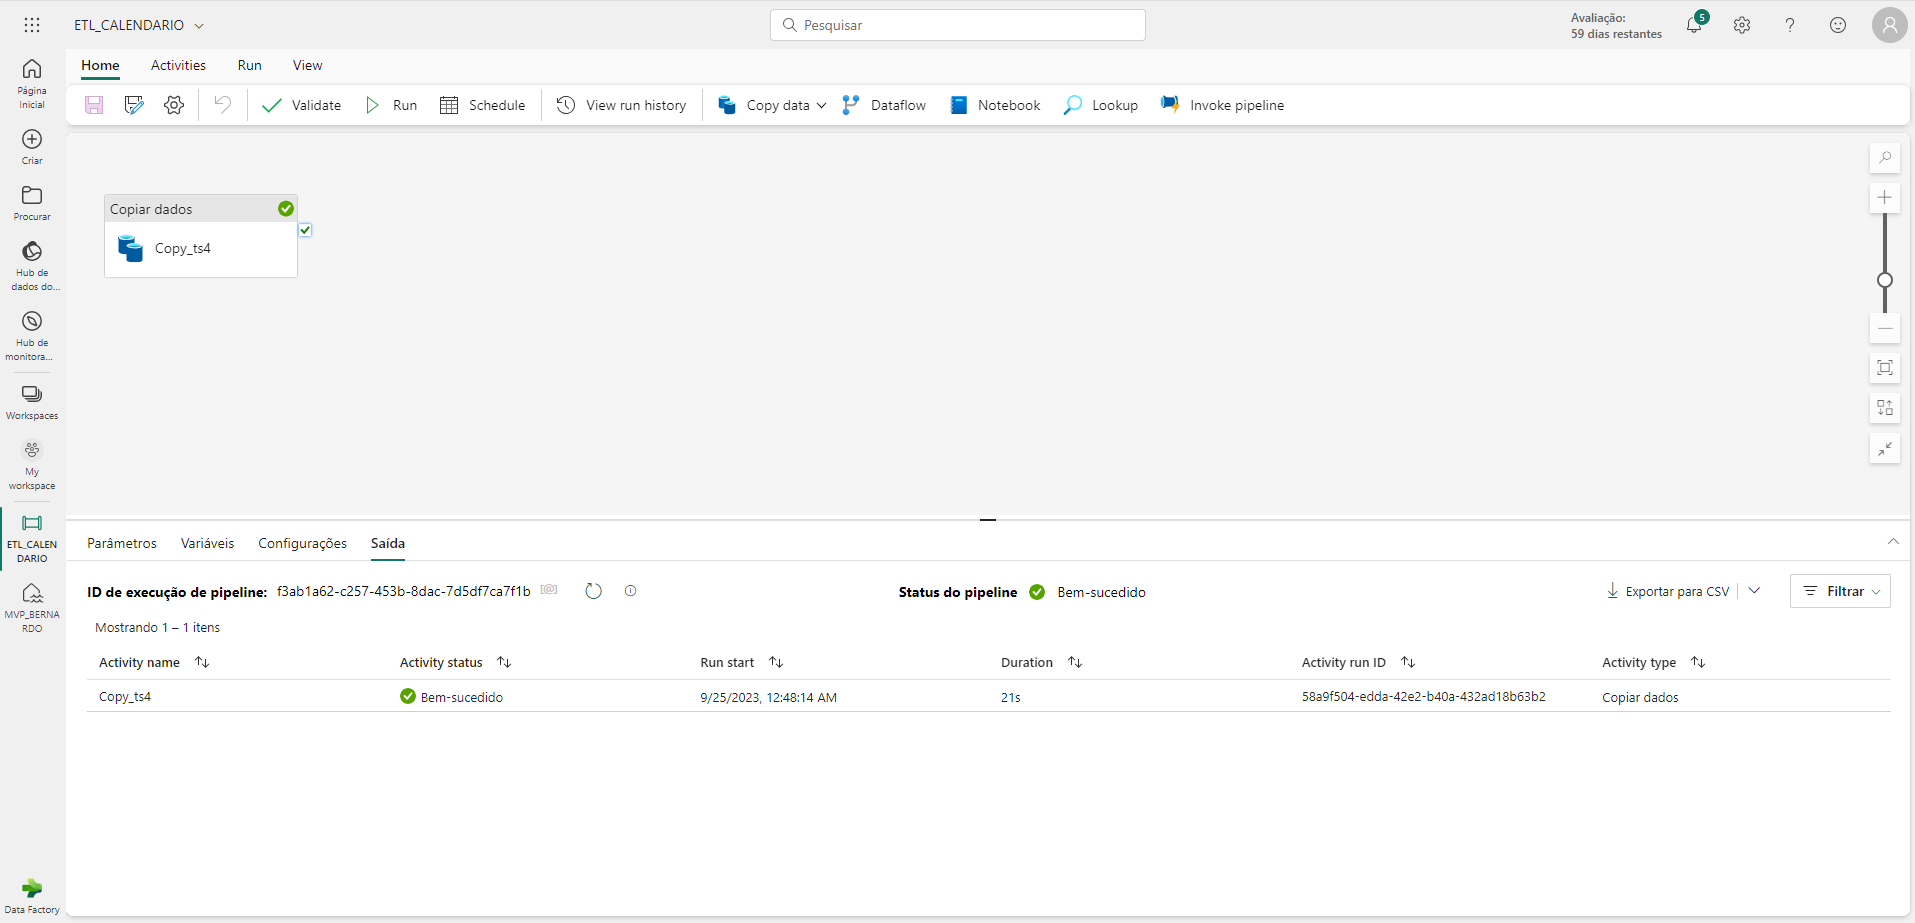

## 1.2 - Criação de Data Flow - Data Lake

O mesmo processo foi criado para transformar o arquivo csv com as informações de vendas em formato tabular do Data Lake. Porém, para diferenciar o método e explorar as ferramentas da plataforma, foi utilizado o  Data Flow nesse caso, vide imagem abaixo.

Na imagem abaixo, é possível reparar as transformações aplicadas. Foram inseridas consultas da tabela DIM_CALENDARIO criada no Data Lake e o arquivo bruto csv com as vendas.

Cada ícone dos blocos é uma transformação aplicada. Nesse caso, foi tratada a remoção de espaços em brancos, utilização da primeira linha do arquivo como cabeçalho, substituição de ponto (.) por vírgula (,) nas colunas de valores numéricos decimais, alteração dos formatos das colunas (string, decimal, int) e renomeação das colunas.

Em seguida, foi feita a etapa de Join (Left Join) entre as tabelas DIM_CALENDARIO e a tabela sendo criada de vendas para acrescentar uma coluna a venda classificando se aquela linha é referente a uma venda em dia útil ou não.

Por fim, os dados foram carregados para a subdivisão Tables do Lake House para visualização das informações do arquivo csv em formato tabular.

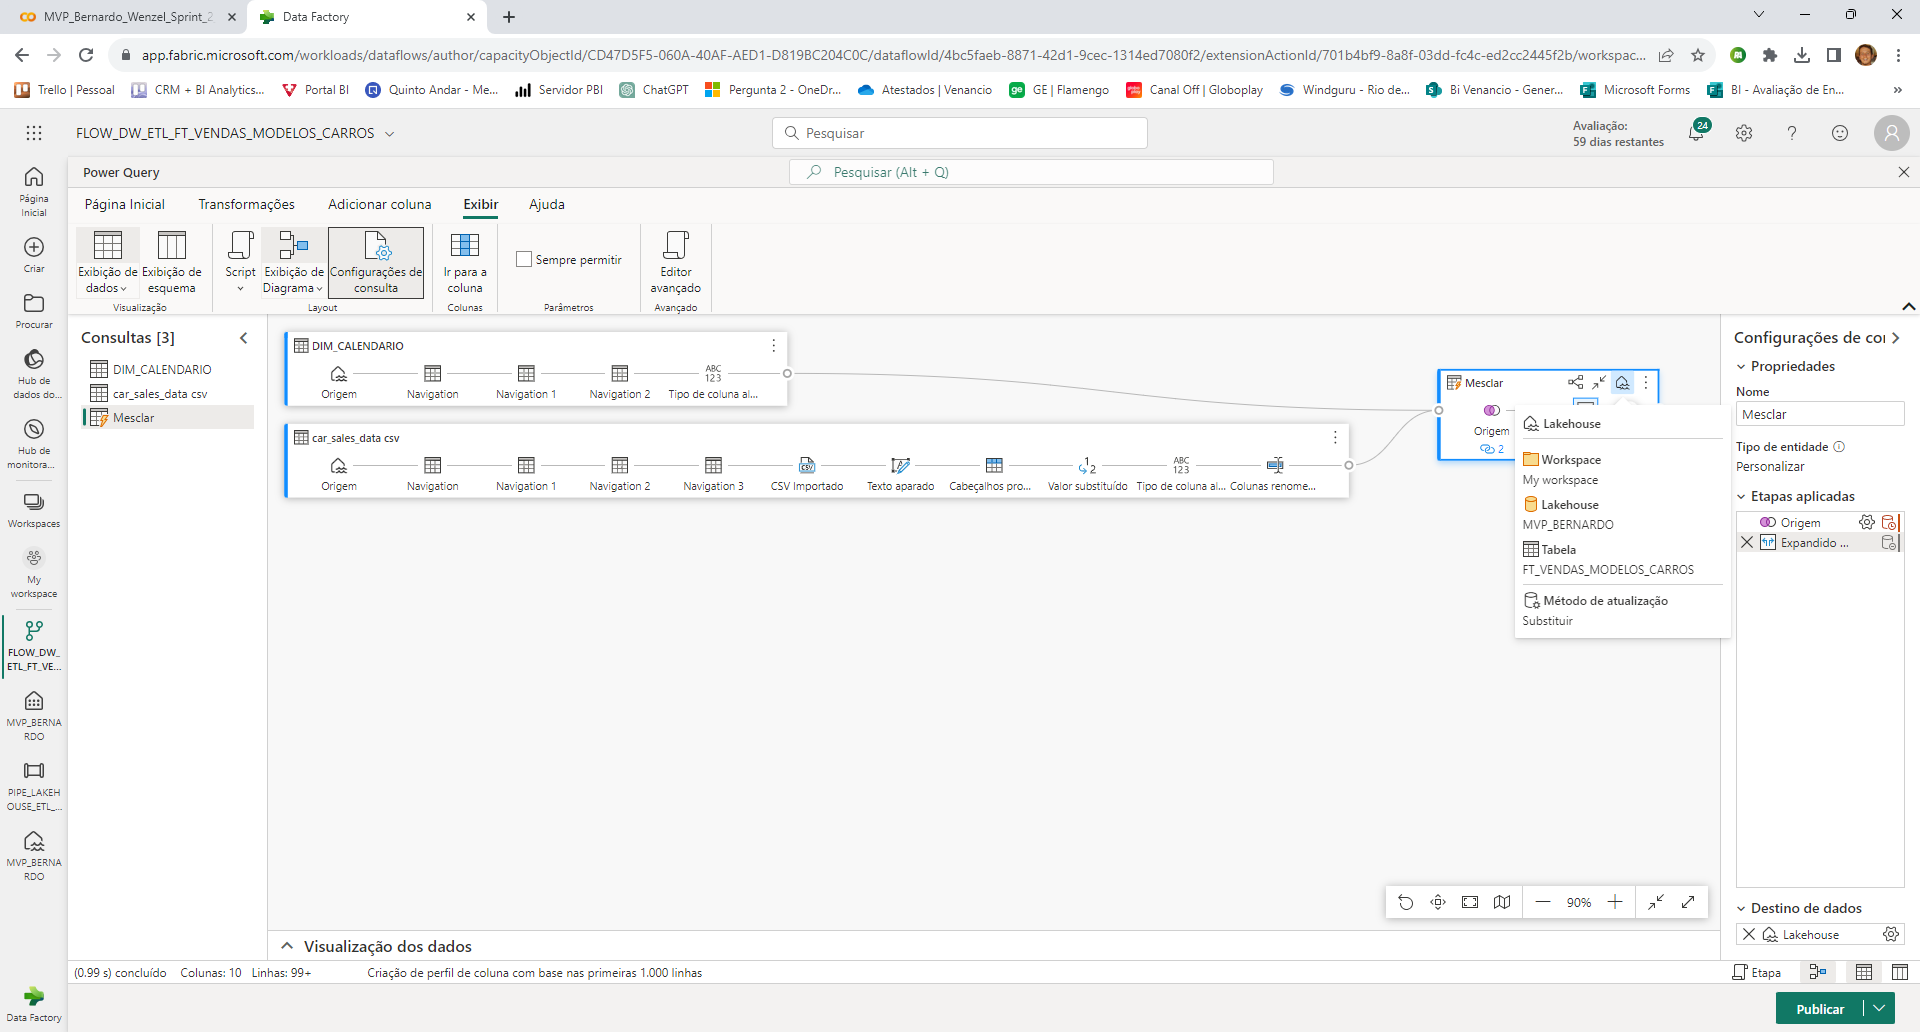

# 2 - Data Warehouse

Criação do Data Warehouse, conforme imagem abaixo. Dentro do DW é possível visualizar todas as tabelas, executar queries em linguagem SQL, criar rápidas análises gráficas sobre os dados e criar a modelagem dos dados, relacionando tabelas dimensões com as fatos.

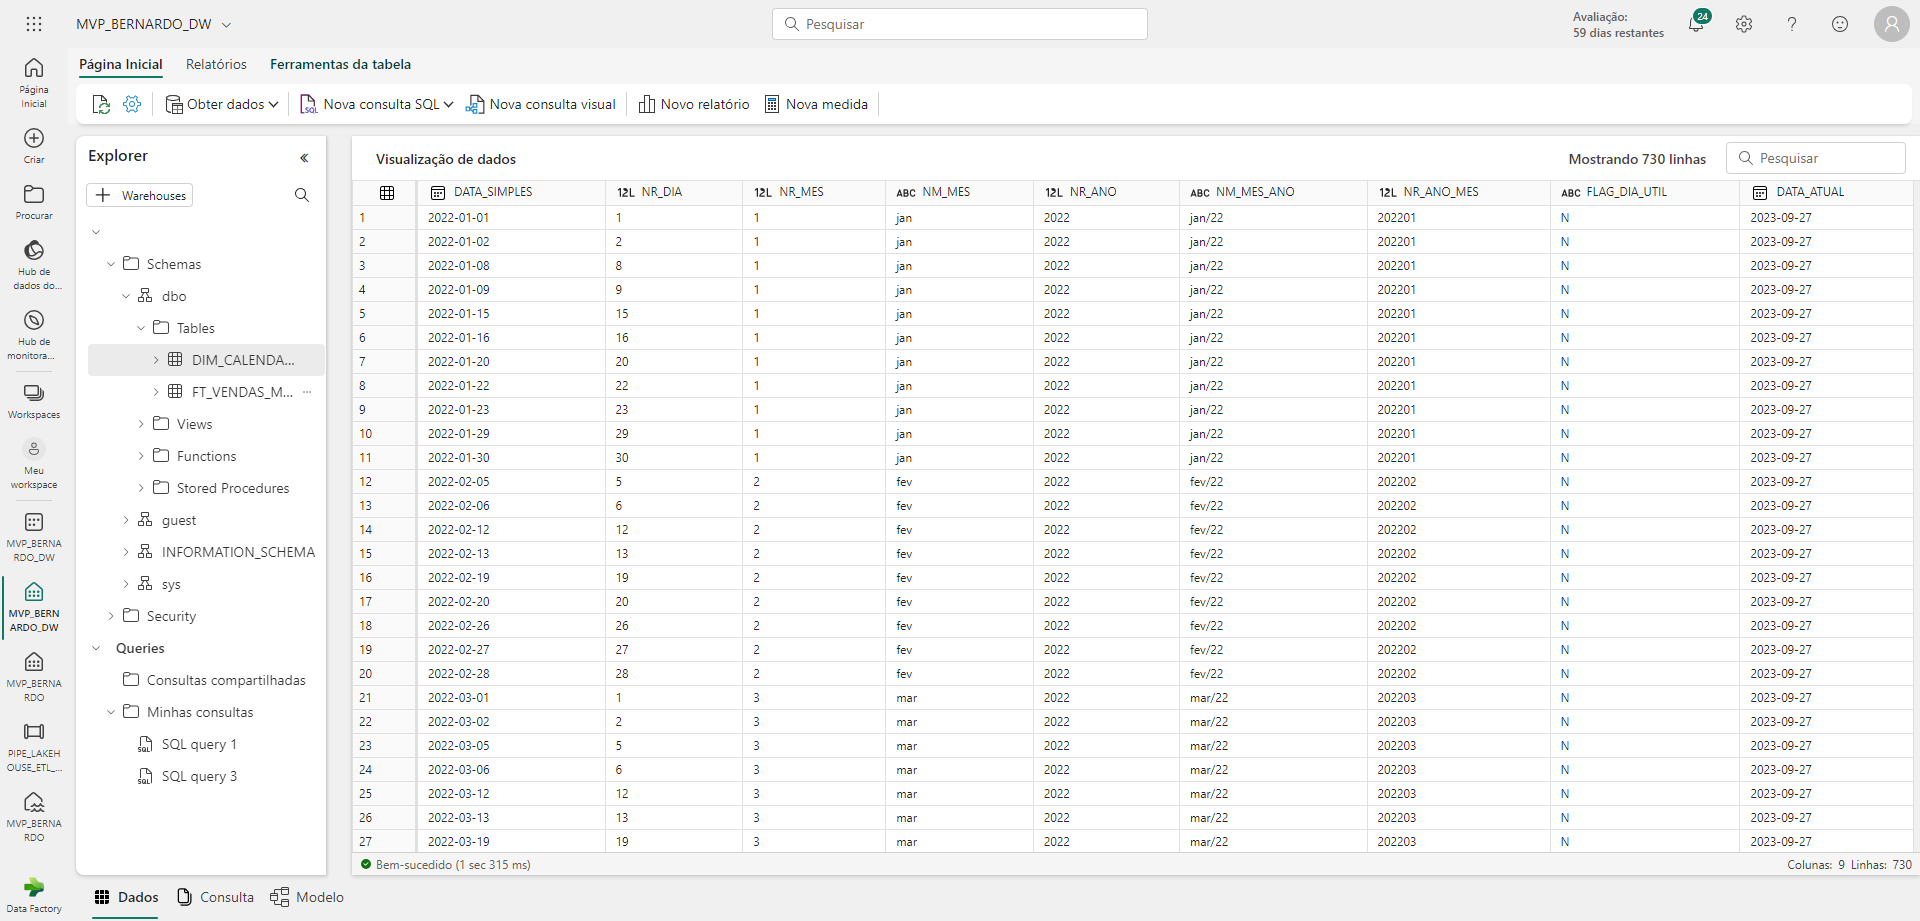

# 3 - Modelagem

Para o case do MVP, o DW contempla duas tabelas, sendo uma dimensão de calendário (DIM_CALENDARIO) e a outra o registro das vendas da empresa (FT_VENDAS_MODELOS_CARROS).

Conforme imagens abaixo, foi criado um DW modelado pelo esquema estrela, onde a tabela dimensão se relaciona com a tabela fato.

Nesse caso, a cardinalidade do relacionamento é de um para muitos, com sentido único da dimensão para a fato.

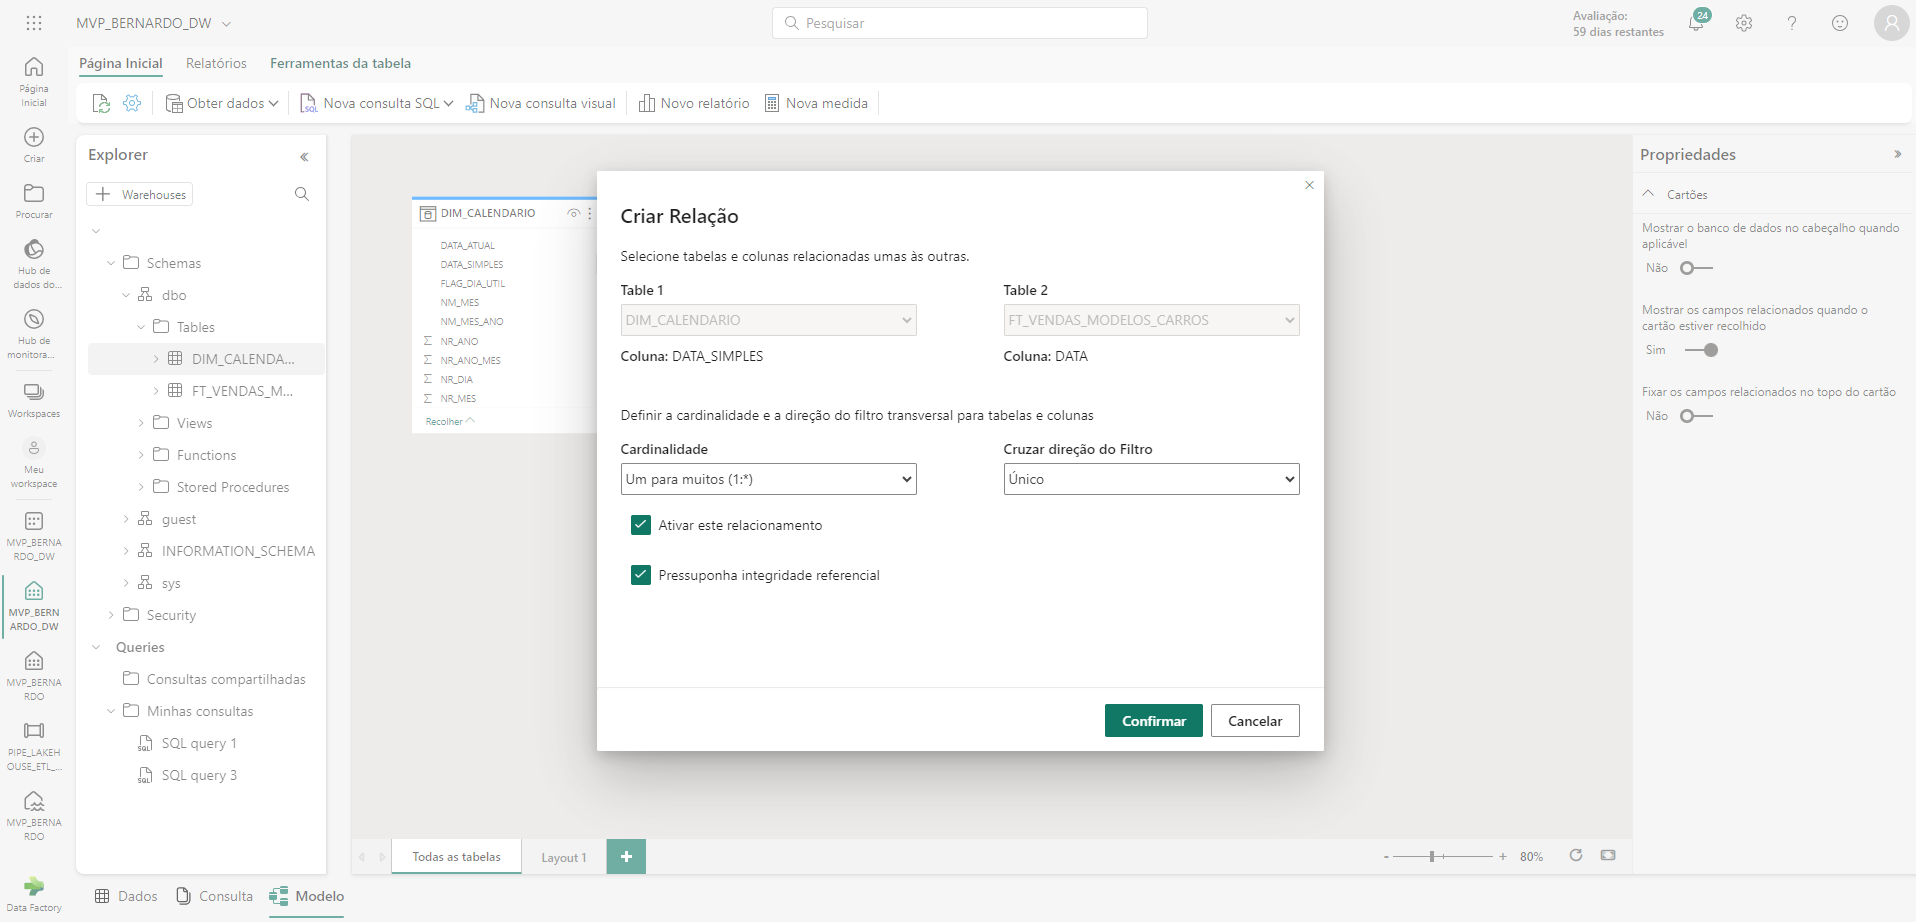

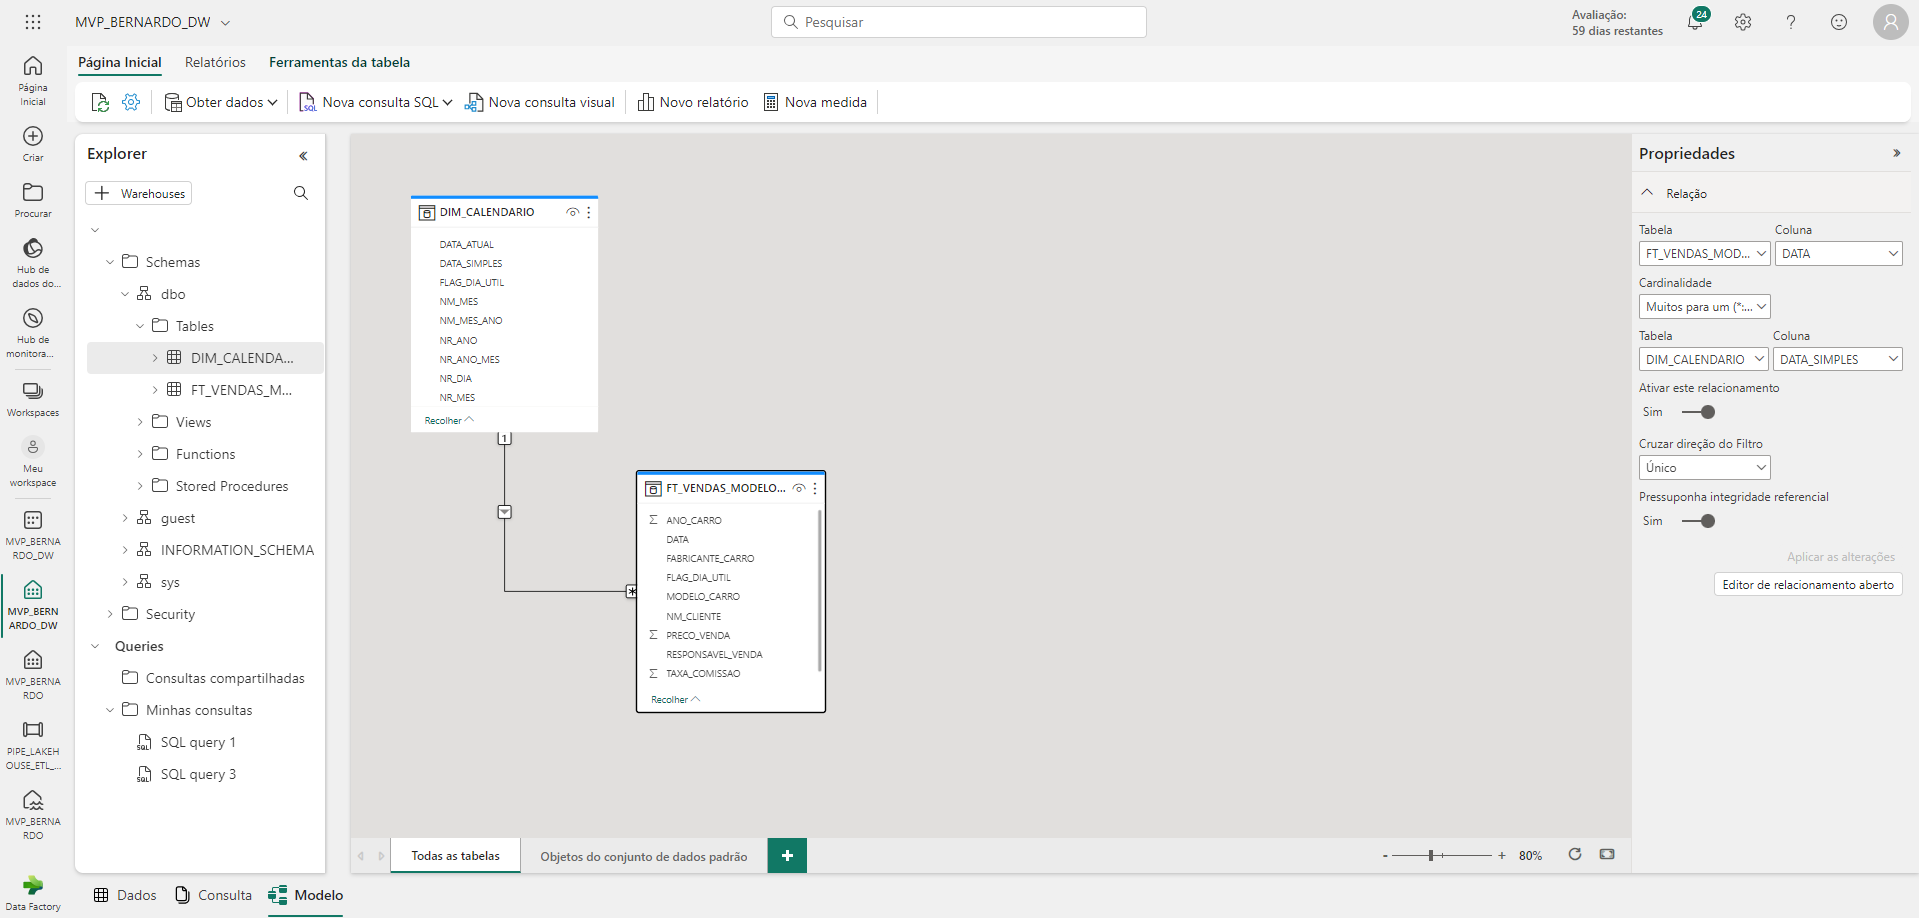

## 3.1 - Catalogação dos Dados

O Microsoft Fabric ainda não possui uma ferramenta específica para catalogação dos dados na versão de teste. Está previsto que terá para a versão oficial.

Portanto, excepcionalmente para esse caso, a catalogação teve que ser feita separadamente em um arquivo excel para cada uma das duas tabelas do DW.

A fim de garantir a integridade e acesso aos dados, os arquivos foram carregados para o Data Lake para que possam ser tratados e carregados num possível banco de dados auxiliar para realizar essas consultas enquanto a ferramenta não viabiliza uma forma integrada de catalogar os dados.

Abaixo foram anexados imagens da catalogação desses dados.

**DIM_CALENDARIO**

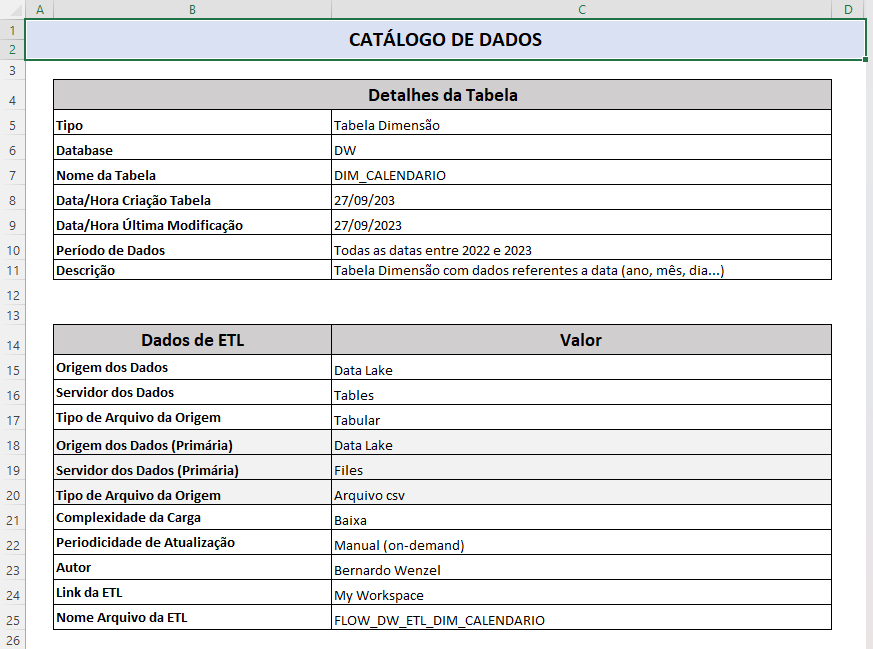

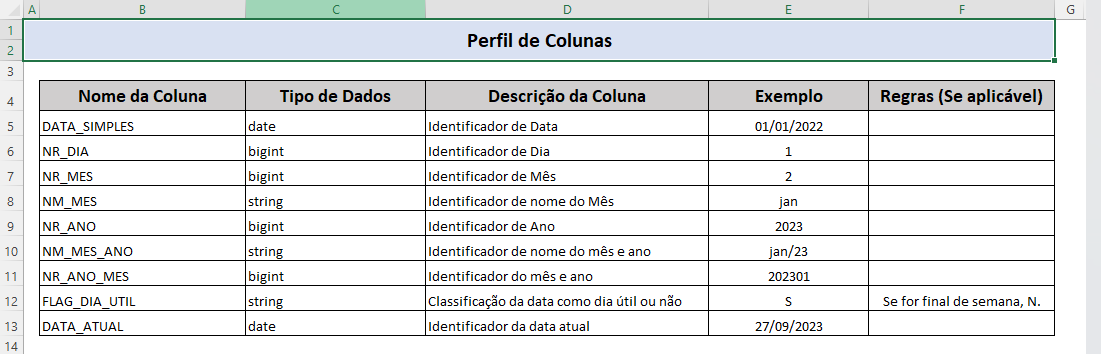

**FT_VENDAS_MODELOS_CARROS**

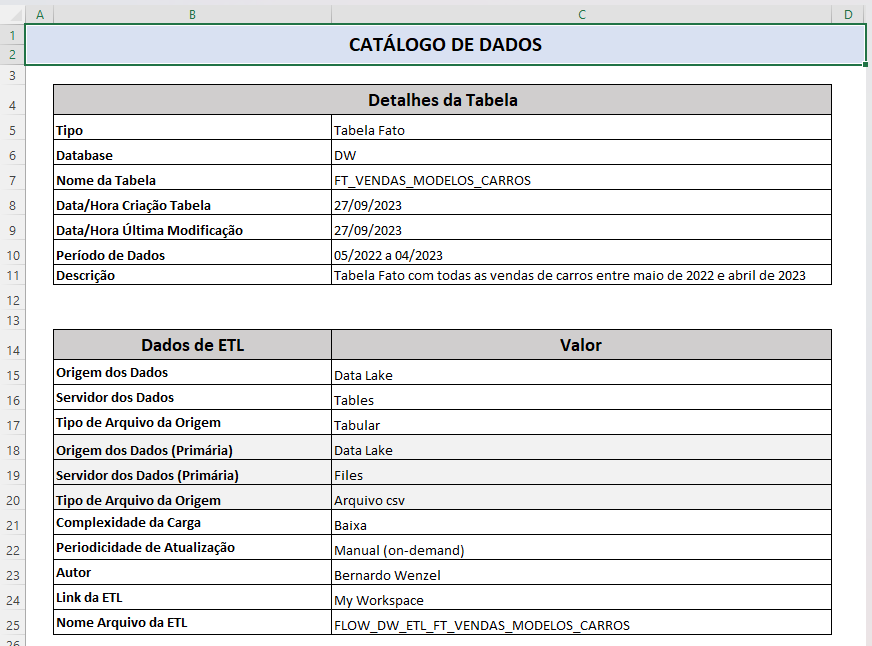

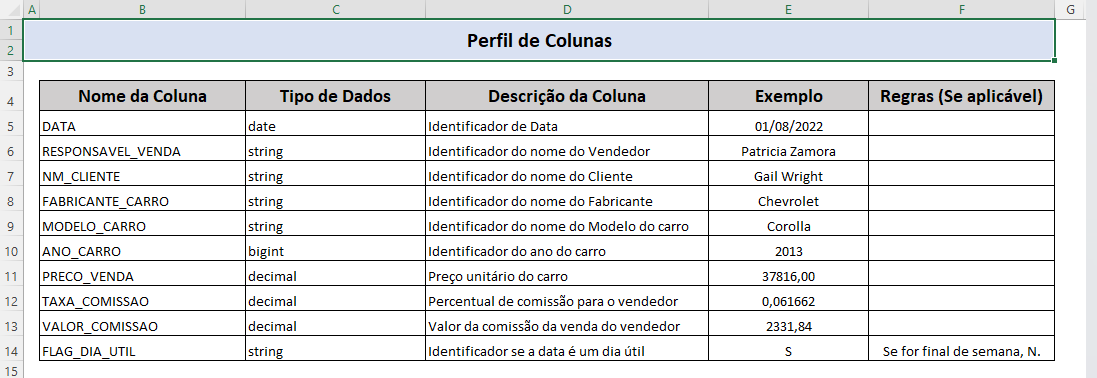

# 4 - Carga dos Dados

**ETL do Data Lake para o Data Warehouse**

Nessa etapa, é feito o processo de ETL dos dados da tabela DIM_CALENDARIO do Data Lake para criar essa tabela no DW.

No tópico 2, nota-se que a imagem anexada foi retirada após esse processo de criação da tabela no DW para ilustrar como é o Data Warehouse e as modelagens que são possíveis fazer.

Para essa carga ao DW, foi utilizada a mesma ferramenta do tópico 1.2: o Data Flow. Porém, para esta etapa, o fluxo dos dados é do Data Lake para o Data Warehouse, aplicando os tratamentos necessários (caso necessite).

Como já tinha feito alguns tratamentos na tabela calendário anteriormente para criação da tabela no Data Lake, nessa etapa foi necessária apenas a criação de uma nova coluna com a data atual para todas as linhas.

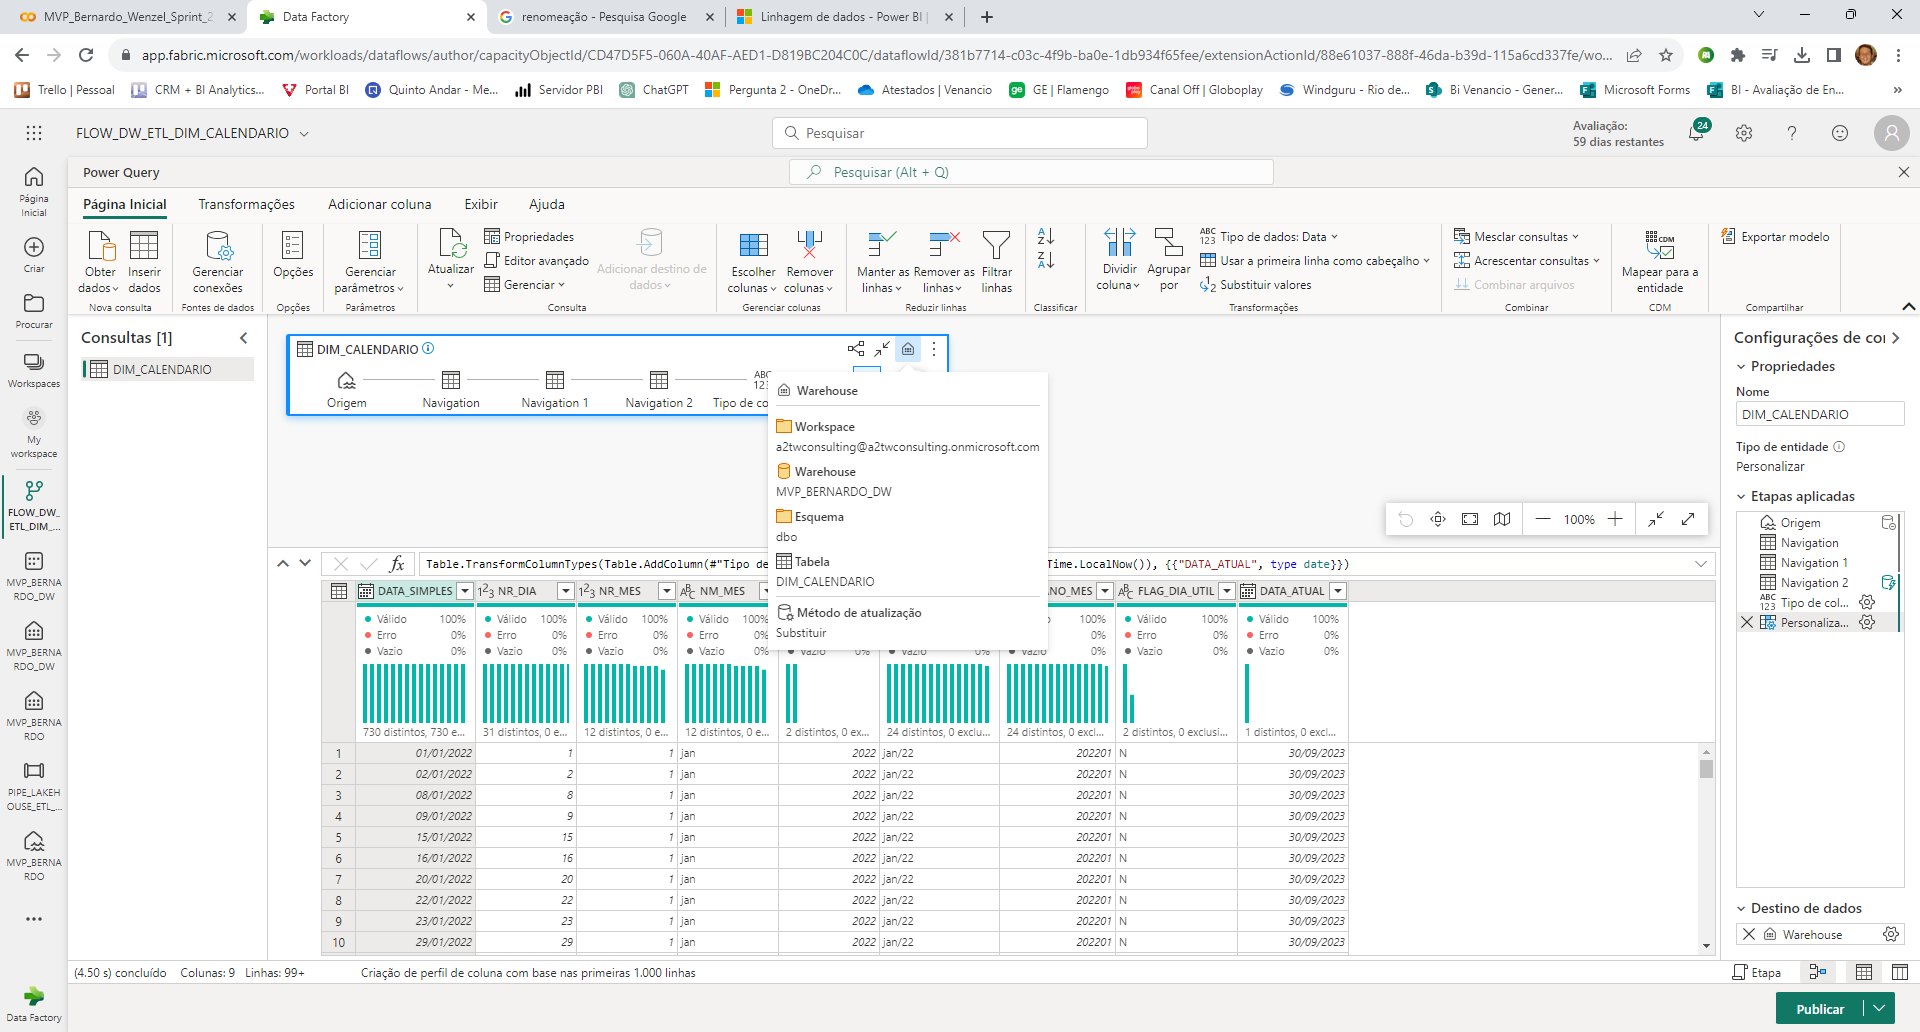

# 5 - Análise dos Dados

## 5.1 - Qualidade dos Dados

No processo de ETL, tanto para criação de tabelas no Data Warehouse ou no Lake House (formato tabular dos dados brutos), utilizando a ferramenta Data Flow é possível avaliar a qualidade dos dados e perfil de cada coluna.

Essa informação fica armazenada no próprio fluxo criado, permitindo a consulta sempre que necessário, vide imagem abaixo.

É possível identificar valores nulos, mínimos e máximos.

No entanto, essa é uma função do Microsoft Fabric que ainda não está disponível por completo na versão de teste. É esperado que na versão oficial tenha uma ferramenta específica para conseguir verificar a qualidade dos dados de forma mais ampla e detalhista.

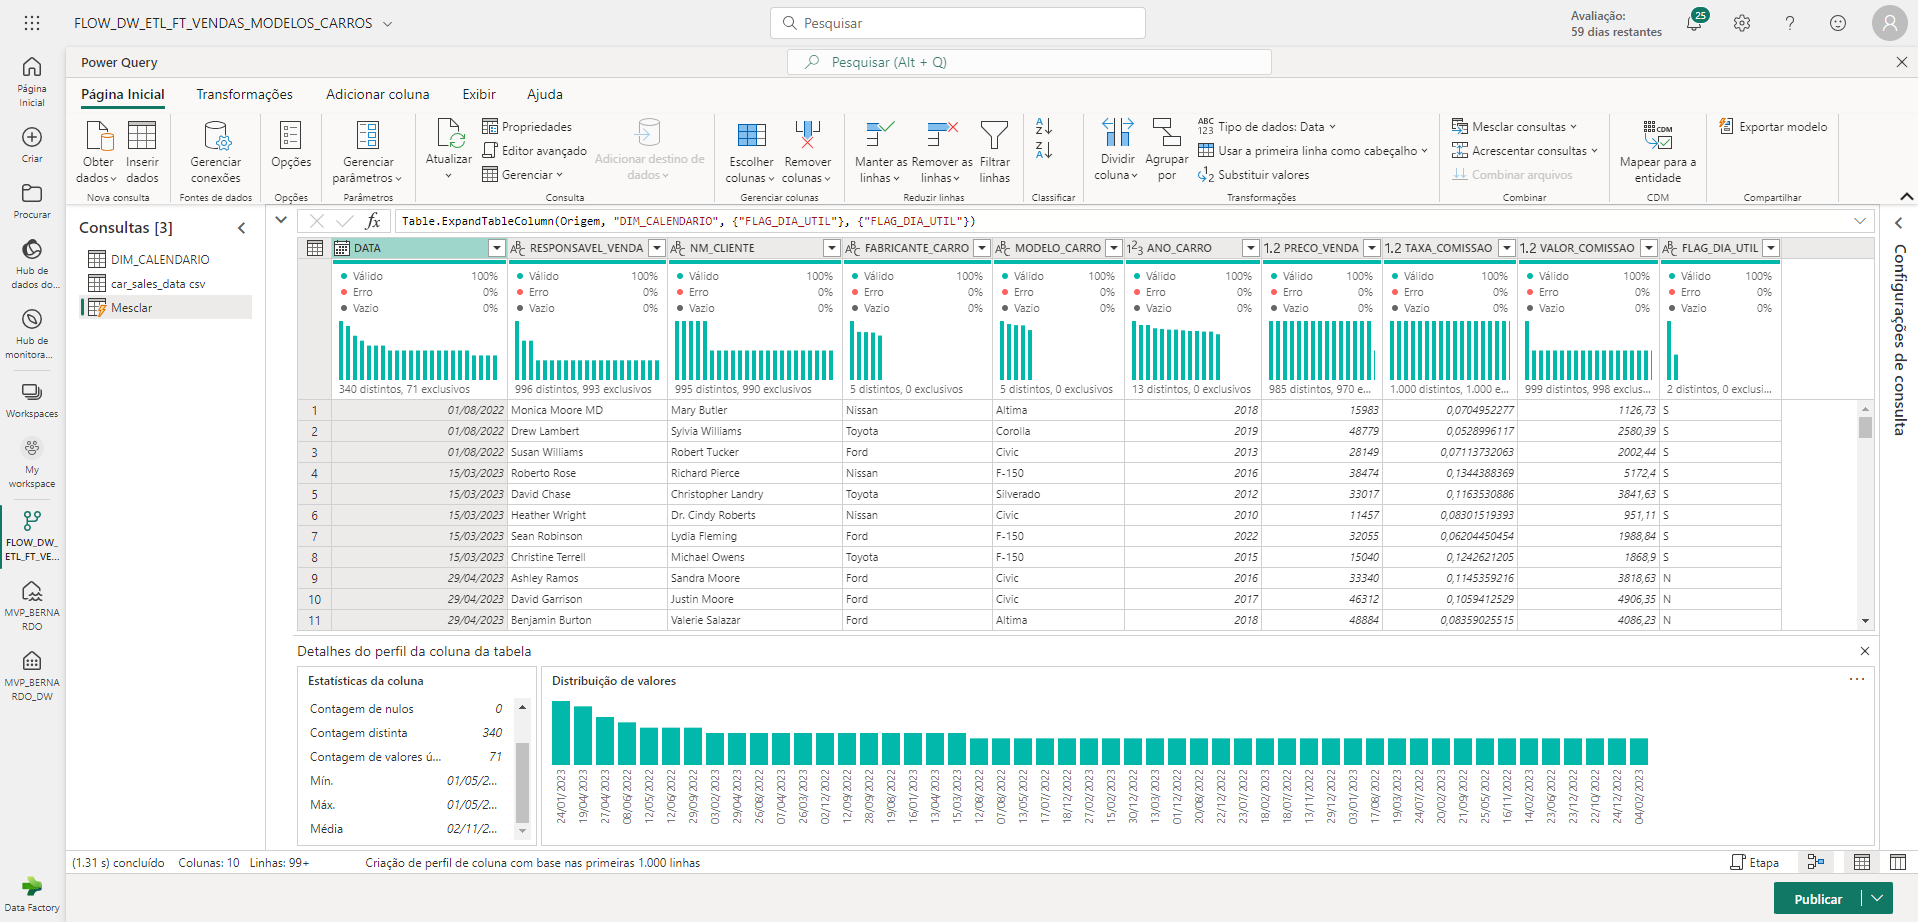

## 5.2 - Solução do Problema

Para a solução do problema, foi desenvolvido um dashboard de vendas utilizando o Power BI. O intuito era identificar de forma geral e rápida como tem sido o comportamento das vendas da empresa num retrato de maio de 2022 até abril de 2023.

A empresa possui uma carteira pequena de carros. Por temer uma recessão e já percebendo uma certa movimentação das empresas concorrentes com algumas demissões, o diretor comercial solicitou esse dashboard onde conseguisse ver rapidamente histórico das vendas.

Imagem abaixo.

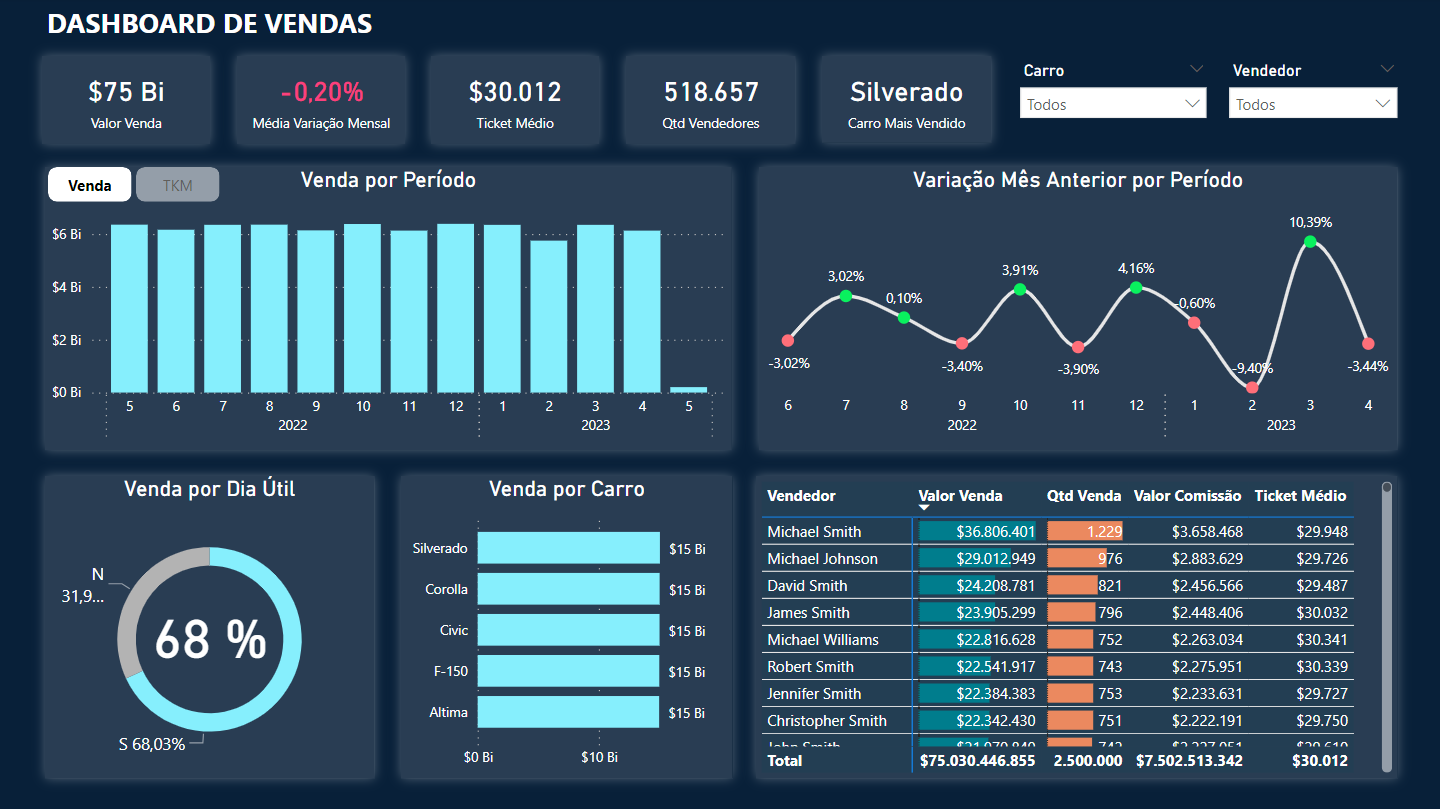


É possível reparar que cada carro possui um montante de venda em valor muito similar. Porém, nota-se no primeiro e no segundo gráficos que há uma tendência de queda nas vendas, conforme o diretor já projetava.

Analisando as últimas 11 variações mensais, 6 tiveram queda nas vendas quando comparado ao mês anterior.
A média de variação mensal do período todo foi negativa, de -0,20%.

Aparentemente, é uma variação pequena. No entanto, considerando que é uma empresa multibilionária, essa pequena queda possui um impacto muito relevante no faturamento da empresa.

Além da informação sobre a venda, no primeiro gráfico é possível alternar a visualização para Ticket Médio e ver como tem sido o comportamento ao longo do tempo, vide imagem abaixo.

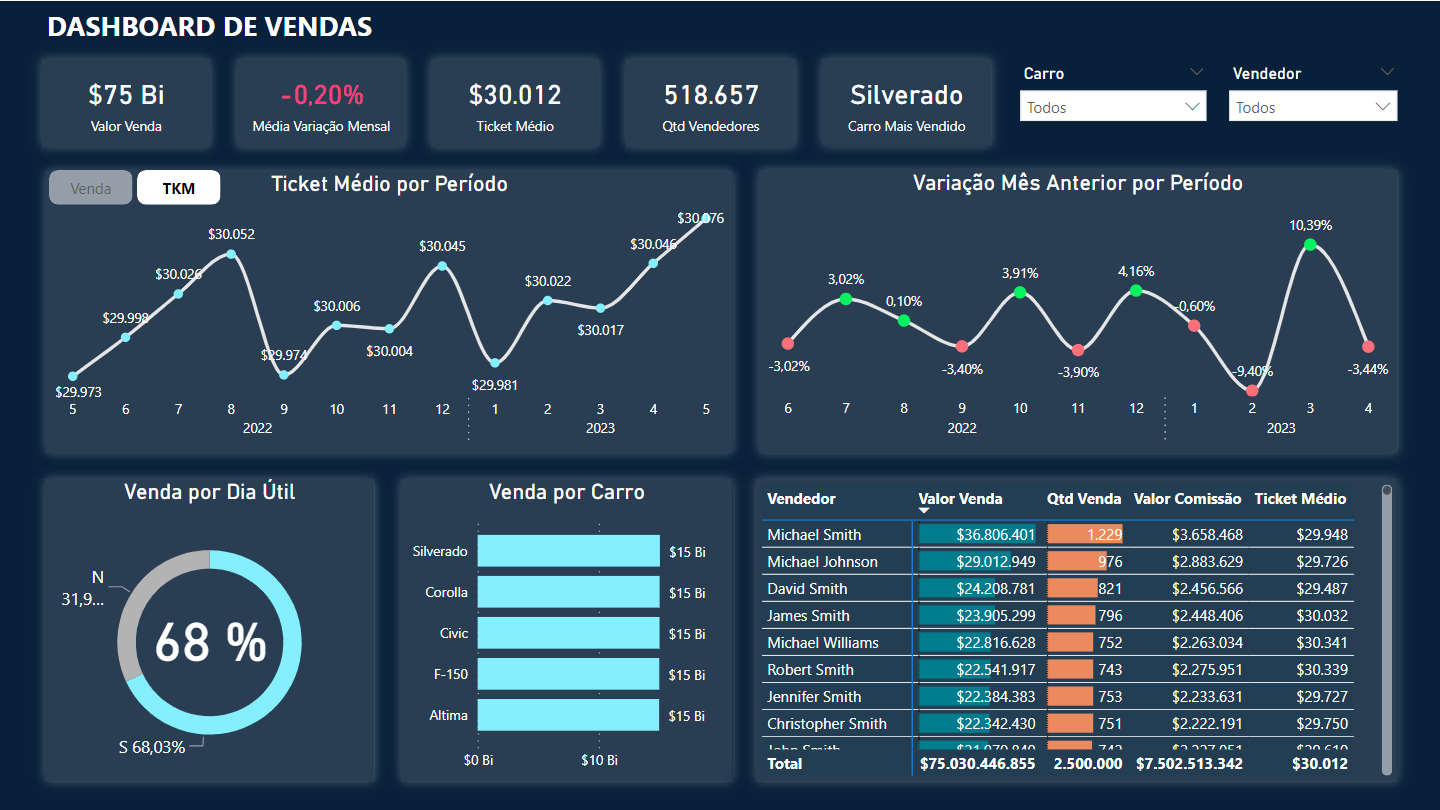

Em contrapartida a venda, o Ticket Médio geral da empresa possui uma tendência de aumento.

Isso se caractericteriza pela manutenção do preço dos automóveis, porém queda no volume de vendas.

No dashboard, também foi disponibilizada uma tabela com dados gerais sobre os vendedores, contendo valor de venda, quantidade de vendas, valor da comissão e ticket médio.

Dependendo da ordenação, é possível identificar os melhores e piores para cada um dos indicadores e traçar uma estratégia de sugestão aos franqueados sobre a manutenção ou corte do quadro de funcionários das parceiras, se necessário.

Além disso, o gráfico de rosca entrega a informação de que cerca de 70% das vendas da empresa ocorrem em dias úteis.

A partir dessa informação, pode-se pensar em campanhas de incentivo de vendas e marketing para atrair os consumidores aos finais de semana e feriados, oferecendo alguma vantagem ou cortesia no atendimento.

## 5.3 - Considerações Finais

A ferramenta Microsoft Fabric é muito completa, englobando todo o processo de dados de ponta a ponta, desde a ingestão dos dados brutos em um Data Lake até a criação do relaótio final em Power BI.

O processamento das tabelas e ETLs foi rápido. Todas as etapas realizadas são bem intuitivas, principalmente para o meu caso que já traballho com Power BI e Power Query há alguns anos.

Ainda faltam alguns recursos como catalogação de dados, qualidade dos dados, uma forma mais clara e objetiva da linhagem de dados, mas são features que devem vir para a versão oficial. Esses recursos fazem falta principalmente para a documentação de todas as tabelas, bancos, colunas e regras criadas.